# Preprocess data 

### Loading data and dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import json
import csv
import os
from collections import defaultdict
import glob

# Display imports
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)
palette = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(11, 8)})

In [2]:
data_dir = "../data/omny/omny_studio_data/"

nl_path = os.path.join(data_dir, "programs_nl.csv")
be_path = os.path.join(data_dir, "programs_be.csv")


In [3]:
df_nl = pd.read_csv(nl_path)
df_be = pd.read_csv(be_path)

### Cleaning the data

In [4]:
print("There are {} dutch podcast shows and {} belgian podcast shows".format(len(df_nl), len(df_be)))
df = pd.concat([df_nl, df_be])
print("There are {} podcast shows in total".format(len(df)))


There are 146 dutch podcast shows and 124 belgian podcast shows
There are 270 podcast shows in total


In [5]:
# The column categories is not correctly parsed, split it to list. 
df['Categories'] = df['Categories'].str.replace(" & ", "")
df['Categories'] = df['Categories'].str.replace("TV", "Tv")
df['Categories'] = df['Categories'].str.findall('(?<!\s)[A-ZÄÖÜ](?:[a-zäöüß\s]|(?<=\s)[A-ZÄÖÜ])*')

# Dropping non-informative columns
print("These are the original column names: ")
print(list(df_nl.columns))
non_informative_cols = ['SocialWeb','DescriptionHtml', 'ArtworkUrl', 'ExternalId', 'Archived','SocialTwitter', 'Publisher', 'SocialFacebook', 'Copyright', 'CustomFieldData', 'Hidden', 'ContactEmail', 'ContactName']
df = df.drop(non_informative_cols, axis=1)
print("Remaining informative columns: ")
print(list(df.columns))


# Rename ID to Program ID
df.rename(columns = {'Id':'ProgramId'}, inplace = True)
df.rename(columns = {'Description':'ProgramDescription'}, inplace = True)
df.rename(columns = {'Slug':'ProgramSlug'}, inplace = True)
df.head(15)



These are the original column names: 
['Archived', 'ArtworkUrl', 'Author', 'Categories', 'Category', 'ContactEmail', 'ContactName', 'Copyright', 'CustomFieldData', 'DefaultPlaylistId', 'Description', 'DescriptionHtml', 'ExternalId', 'Hidden', 'Id', 'Language', 'Name', 'Network', 'NetworkId', 'Publisher', 'Slug', 'SocialFacebook', 'SocialTwitter', 'SocialWeb']
Remaining informative columns: 
['Author', 'Categories', 'Category', 'DefaultPlaylistId', 'Description', 'Id', 'Language', 'Name', 'Network', 'NetworkId', 'Slug']


,Author,Categories,Category,DefaultPlaylistId,ProgramDescription,ProgramId,Language,Name,Network,NetworkId,ProgramSlug
0,NaN,[Music],Music,8877c31c-4a93-4833-8fe4-ac2c00e1371e,Armin van Buuren startte in 2001 gestart met A...,d227314f-e3f2-4fbe-8e63-ac2c00e0d216,en-US,A State Of Trance met Armin van Buuren,Qmusic,d30c23a2-0980-404c-9ebf-abae00cafe1b,a-state-of-trance-met-armin-van-buuren
1,De Ondernemer,"[Entrepreneurship, Marketing, Business]",Entrepreneurship,87263590-49d4-4df7-822b-ad7c00e31c39,Tijdens deze podcast serie signaleren we onlin...,b56fcee4-6cec-44e5-b244-ad7c00e2eac7,nl,Aandachtstrekkers | De Ondernemer,De Ondernemer,3e40a8a4-96d0-4706-9d42-abb400de93ee,aandachtstrekkers-de-ondernemer
2,AD,"[News, Society, Culture]",News,379c8267-ef89-4440-a737-abae007e94b2,Iedere dag verschijnen er honderden verschille...,d2479761-6302-452a-8652-abae007e94a9,nl,Achter het Verhaal,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,achter-het-verhaal
3,NaN,[News],News,96fdaa02-a0cf-4cbd-bc5e-ac9200937420,NaN,30c92b0e-34d0-44af-8ed9-ac9200931205,nl,AD audionieuws,Overig,1205ca6d-5aec-4cc4-82c1-adb700a29fe1,ad-audionieuws
4,Algemeen Dagblad,[Tv Reviews],TV Reviews,1b35dee1-dd50-40b8-928a-abae007e94d3,TV-columniste Angela de Jong en verslaggevers ...,381a0163-63c5-4512-9a0e-abae007e94ce,nl,AD Media Podcast,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,ad-media-podcast
5,DPG Media,"[News, Daily News]",News,e9a1b7b7-d26d-4e85-b282-abae007e9525,Luister naar het beste van de Nieuws Updates v...,db6e9d06-cb43-44b4-b7a2-abae007e9520,nl,AD Nieuws Update,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,ad-nieuws-update
6,AD,[News],News,b102efe6-e832-4bda-aa4b-abae007e9502,AD Special Podcast,c6c55632-bb0e-4af9-a764-abae007e9502,nl,AD Special Podcast,Overig,1205ca6d-5aec-4cc4-82c1-adb700a29fe1,ad-special-podcast
7,Algemeen Dagblad,"[Sports, News, Soccer]",Sports,176c1b6c-c144-48c0-9b70-abae007e950b,Een podcast over het voetbal van het AD. Prese...,6b7fd3a5-faa4-49d7-8618-abae007e950b,nl,AD Voetbal podcast,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,ad-voetbal-podcast
8,NaN,[Books],Books,df345e2d-ae99-4b18-90fc-ac950091fb7f,ITA en Het Parool presenteren: Alice in Wonder...,f0e8e8f7-3744-492a-8742-ac950091b122,nl,Alice in Wonderland,Het Parool,d1235080-6f4b-4c46-8051-abae00c9dfbe,alice-in-wonderland
9,DPG Media,[Sports],Sports,50c3d04f-f56e-4c4f-8c0c-abae00ccaa5b,Voetbalwatchers Fardau Wagenaar en Leon ten Vo...,0c959dc2-ccc2-4cb8-8a56-abae00ccaa51,nl,Ballen verstand,Tubantia,ec27a604-f5a6-4806-b118-abae00ccaa5b,ballen-verstand


### Analysis of shows

In [6]:

unique_id = pd.unique(df.ProgramId)
print("Unique IDs: ", len(unique_id))

unique_slug = pd.unique(df.ProgramSlug)
print("Unique slugs: ", len(unique_slug))

unique_authors = pd.unique(df.Author)
print("Unique authors: ", len(unique_authors))

unique_categories = pd.unique(df.Category)
print("Unique categories: ", len(unique_categories))

unique_descr = pd.unique(df.ProgramDescription)
print("\nThere are {} unique descriptions".format(len(unique_descr)))
print("All other descriptions are NaN ({})".format(df.ProgramDescription.isna().sum()))




# There are two podcasts with the same name (from Trouw vs Parool)
unique_name = pd.unique(df.Name)
print("\nThere are {} unique show names".format(len(unique_name)))
print("So there are two shows with the same name: ")
print("{} exists for Trouw and Parool \n".format(df[df.duplicated(['Name'], keep=False)]['Name']))

unique_network = pd.unique(df.Network)
print("Unique networks: ", len(unique_network))

unique_netid = pd.unique(df.NetworkId)
print("Unique networkIDs: ", len(unique_netid))
print("So there are two networks that have multiple IDS: ")
df_new = df.groupby(['NetworkId', 'Network'],as_index=False).first()
print(df_new[df_new.duplicated(['Network'], keep=False)]['Network'])
print("For analysis it is better to use Network name than Id.\n")



unique_lang = pd.unique(df.Language)
print("There are {} languages: {}".format(len(unique_lang), unique_lang))
print(df.Language.value_counts())


Unique IDs:  270
Unique slugs:  270
Unique authors:  61
Unique categories:  39

There are 199 unique descriptions
All other descriptions are NaN (71)

There are 269 unique show names
So there are two shows with the same name: 
99     Onverdoofd
100    Onverdoofd
Name: Name, dtype: object exists for Trouw and Parool 

Unique networks:  35
Unique networkIDs:  37
So there are two networks that have multiple IDS: 
1        Qmusic
12    DPG Media
16    DPG Media
28       Qmusic
Name: Network, dtype: object
For analysis it is better to use Network name than Id.

There are 4 languages: ['en-US' 'nl' 'fr' 'da']
nl       205
da        61
en-US      3
fr         1
Name: Language, dtype: int64


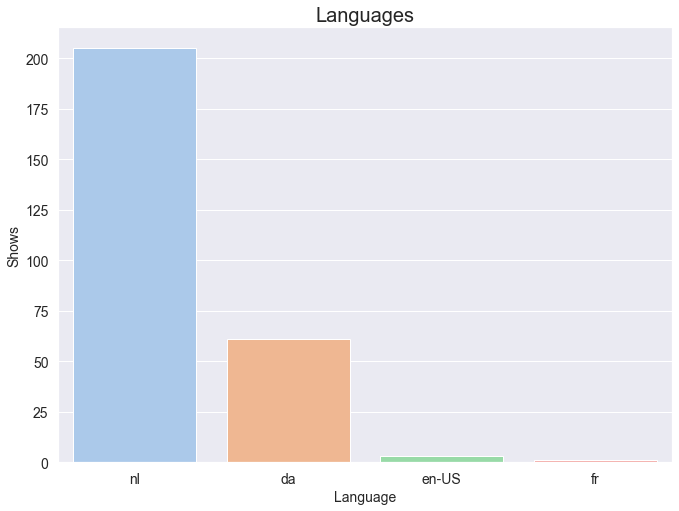

In [7]:
genre_names = df['Language'].value_counts().index
genre_values = df['Language'].value_counts().values

# Show barplot
b = sns.barplot(x=genre_names[:15], y=genre_values[:15], palette=palette)
b.axes.set_title("Languages",fontsize=20)
b.set_xlabel("Language",fontsize=14)
b.set_ylabel("Shows",fontsize=14)
b.tick_params(labelsize=14)
plt.show()

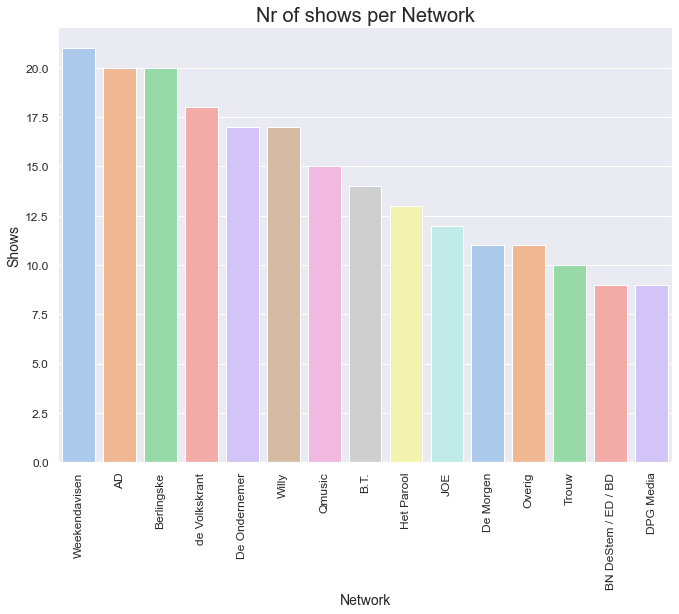

In [8]:
# Plot for nr of shows per network
genre_names = df['Network'].value_counts().index
genre_values = df['Network'].value_counts().values

# Show barplot
plt.xticks(rotation=90)
b = sns.barplot(x=genre_names[:15], y=genre_values[:15], palette=palette)
b.axes.set_title("Nr of shows per Network",fontsize=20)
b.set_xlabel("Network",fontsize=14)
b.set_ylabel("Shows",fontsize=14)
b.tick_params(labelsize=12)
plt.show()

### Analysis of episodes


In [9]:
# Creating episode framework
non_informative_cols = ['AudioOptions', 'RecordingMetadata', 
        'RssLinkOverride', 'Season', 'ShareUrl', 'State', 'Tags', 
        'Visibility', 'Episode', 'Monetization', 'DescriptionHtml',
        'ImportedId', 'ExternalId','ImageUrl','PublishState', 'EmbedUrl',
        'PlaylistIds', 'PublishedUrl', 'PublishedAudioSizeInBytes', 'VideoUrl',
        'CustomFieldData']


total = 0
count = 0
program_ids_total = []
    
# path = "path/to/dir/*.csv"
path = os.path.join(data_dir, "*.csv")

for fname in glob.glob(path):
    if "clips" in fname:
        df_tmp = pd.read_csv(fname,  sep=",", na_filter=True, na_values='[]')
        # Drop non-informative columns
        df_tmp = df_tmp.drop(non_informative_cols, axis=1)
        # Remove double quotes
        df_tmp = df_tmp.applymap(lambda x: x.replace('"', '') if (isinstance(x, str)) else x)
        
        if count == 0:
            df_programs = df_tmp.copy()
        else:
            df_programs = df_programs.append(df_tmp, ignore_index=True)

        programIds = df_tmp.ProgramId.unique()
        program_ids_total.extend(programIds)
        
        count += 1
        total += len(df_tmp)

print("columns: ", df_programs.columns)
print("total nr of episodes: ", total)
print("total nr of shows: ", len(program_ids_total))





columns:  Index(['AudioUrl', 'Chapters', 'ContentRating', 'Description',
       'DurationSeconds', 'EpisodeType', 'Id', 'ProgramId', 'PublishedUtc',
       'Slug', 'Title'],
      dtype='object')
total nr of episodes:  22652
total nr of shows:  255


In [10]:
# Merge the two dataframes
df_merged = pd.merge(df, df_programs, on='ProgramId')


In [11]:

def to_timedict(string):
    if type(string) == str:
        string = string.replace("=>", ":")
        key_value = re.findall("\{(.*?)\}", string)
        d = {}
        for k in key_value:
            splitted = k.split(" : ")
            name = splitted[2].split(", ")[0]
            timestamp = splitted[-2].split(", ")[0]
            d[timestamp] = name
        return d
    

df_merged['Chapters_dict'] = df_merged['Chapters'].apply(to_timedict)
df_merged = df_merged.drop(columns='Chapters')

df_merged.head(333)

,Author,Categories,Category,DefaultPlaylistId,ProgramDescription,ProgramId,Language,Name,Network,NetworkId,...,AudioUrl,ContentRating,Description,DurationSeconds,EpisodeType,Id,PublishedUtc,Slug,Title,Chapters_dict
0,NaN,[Music],Music,8877c31c-4a93-4833-8fe4-ac2c00e1371e,Armin van Buuren startte in 2001 gestart met A...,d227314f-e3f2-4fbe-8e63-ac2c00e0d216,en-US,A State Of Trance met Armin van Buuren,Qmusic,d30c23a2-0980-404c-9ebf-abae00cafe1b,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,,7126.857,Full,e8671abb-0e09-4c9c-85c3-adb100a461d9,2021-09-28 10:08:51,a-state-of-trance-met-armin-van-buuren-episode-30,A State Of Trance met Armin van Buuren - Episo...,None
1,De Ondernemer,"[Entrepreneurship, Marketing, Business]",Entrepreneurship,87263590-49d4-4df7-822b-ad7c00e31c39,Tijdens deze podcast serie signaleren we onlin...,b56fcee4-6cec-44e5-b244-ad7c00e2eac7,nl,Aandachtstrekkers | De Ondernemer,De Ondernemer,3e40a8a4-96d0-4706-9d42-abb400de93ee,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,Michel Ariëns en Patrick Wessels zijn uitgelat...,1608.647,Full,2dc60de6-715b-425a-9530-adf100f39dc2,2021-12-10 10:50:51,een-zo-groot-mogelijke-naamsbekendheid-of-beke...,Een zo groot mogelijke naamsbekendheid of beke...,None
2,De Ondernemer,"[Entrepreneurship, Marketing, Business]",Entrepreneurship,87263590-49d4-4df7-822b-ad7c00e31c39,Tijdens deze podcast serie signaleren we onlin...,b56fcee4-6cec-44e5-b244-ad7c00e2eac7,nl,Aandachtstrekkers | De Ondernemer,De Ondernemer,3e40a8a4-96d0-4706-9d42-abb400de93ee,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,Dé manier waarop klanten hun verhaal vertellen...,1626.802,Full,9a3c38d6-7c90-4461-8c13-adad00772627,2021-12-09 14:04:00,waarom-reviews-echt-belangrijk-zijn-voor-jouw-...,Waarom reviews echt belangrijk zijn voor jouw ...,None
3,De Ondernemer,"[Entrepreneurship, Marketing, Business]",Entrepreneurship,87263590-49d4-4df7-822b-ad7c00e31c39,Tijdens deze podcast serie signaleren we onlin...,b56fcee4-6cec-44e5-b244-ad7c00e2eac7,nl,Aandachtstrekkers | De Ondernemer,De Ondernemer,3e40a8a4-96d0-4706-9d42-abb400de93ee,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,"Heel groot of juist heel klein zijn, het heeft...",1584.065,Full,9d712fdd-a448-41f9-b443-adad007725f6,2021-11-23 12:24:00,aandachtstrekkers-13-waarom-grote-bedrijven-su...,Waarom grote bedrijven succesvoller kunnen zij...,None
4,De Ondernemer,"[Entrepreneurship, Marketing, Business]",Entrepreneurship,87263590-49d4-4df7-822b-ad7c00e31c39,Tijdens deze podcast serie signaleren we onlin...,b56fcee4-6cec-44e5-b244-ad7c00e2eac7,nl,Aandachtstrekkers | De Ondernemer,De Ondernemer,3e40a8a4-96d0-4706-9d42-abb400de93ee,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,Bij het krijgen van meer klanten of de verbred...,1691.167,Full,5872fe9f-6206-4047-8324-adad0077248f,2021-11-01 08:44:04,beroemd-zijn-om-aandacht-te-krijgen-dat-heb-ji...,Beroemd zijn om aandacht te krijgen? Dat heb j...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,DPG Media,"[News, Daily News]",News,e9a1b7b7-d26d-4e85-b282-abae007e9525,Luister naar het beste van de Nieuws Updates v...,db6e9d06-cb43-44b4-b7a2-abae007e9520,nl,AD Nieuws Update,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,Dit is de AD Nieuws Update van Donderdag 23 se...,811.468,Full,336f972b-21b4-4315-9a72-adac00840a60,2021-09-23 08:17:49,de-algemene-politieke-beschouwingen-gaan-verde...,De Algemene Politieke Beschouwingen gaan verde...,{'00:00:07.4810000': 'Algemene Politieke Besch...
329,DPG Media,"[News, Daily News]",News,e9a1b7b7-d26d-4e85-b282-abae007e9525,Luister naar het beste van de Nieuws Updates v...,db6e9d06-cb43-44b4-b7a2-abae007e9520,nl,AD Nieuws Update,AD,daf6acb6-8e09-49f2-9762-abae007e94b2,...,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,Unrated,Dit is de AD Nieuws Update van woensdag 22 sep...,957.675,Full,479f993e-8356-4c2f

In [12]:
print("Column names:")
print(df_merged.columns)

print("Example of chapters_dict: \n", df_merged['Chapters_dict'].iloc[328])
print("Example of chapters_dict: \n", df_merged['Chapters_dict'].iloc[333])

Column names:
Index(['Author', 'Categories', 'Category', 'DefaultPlaylistId',
       'ProgramDescription', 'ProgramId', 'Language', 'Name', 'Network',
       'NetworkId', 'ProgramSlug', 'AudioUrl', 'ContentRating', 'Description',
       'DurationSeconds', 'EpisodeType', 'Id', 'PublishedUtc', 'Slug', 'Title',
       'Chapters_dict'],
      dtype='object')
Example of chapters_dict: 
 {'00:00:07.4810000': 'Algemene Politieke Beschouwingen', '00:04:10.9270000': 'Verkiezing Liegebeest 2021', '00:06:50.4430000': 'Sporen van noten', '00:09:54.3210000': "Tekort boa's"}
Example of chapters_dict: 
 {'00:00:08.2960000': 'Marker 01', '00:04:48.0940000': 'Marker 02', '00:09:36.7850000': 'Marker 03'}


In [13]:
for name in list(df_merged.columns):
    if name != "Categories" and name != "Chapters_dict":
        print("There are {} unique vals for column {}".format(len(df_merged[name].unique()), name))

There are 60 unique vals for column Author
There are 39 unique vals for column Category
There are 247 unique vals for column DefaultPlaylistId
There are 190 unique vals for column ProgramDescription
There are 255 unique vals for column ProgramId
There are 3 unique vals for column Language
There are 255 unique vals for column Name
There are 34 unique vals for column Network
There are 36 unique vals for column NetworkId
There are 255 unique vals for column ProgramSlug
There are 22652 unique vals for column AudioUrl
There are 3 unique vals for column ContentRating
There are 11152 unique vals for column Description
There are 14185 unique vals for column DurationSeconds
There are 3 unique vals for column EpisodeType
There are 22652 unique vals for column Id
There are 21493 unique vals for column PublishedUtc
There are 19792 unique vals for column Slug
There are 12917 unique vals for column Title


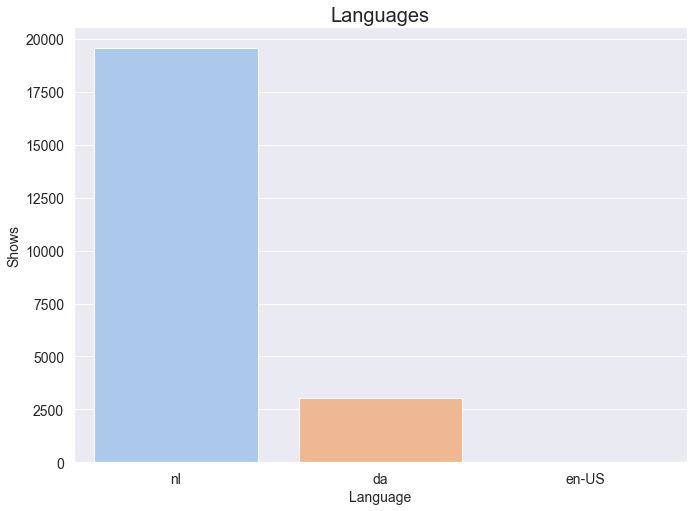

In [14]:
# Plot for Languages
col_ids = df_merged['Language'].value_counts().index
col_values = df_merged['Language'].value_counts().values

# Show barplot
b = sns.barplot(x=col_ids[:15], y=col_values[:15], palette=palette)
b.axes.set_title("Languages",fontsize=20)
b.set_xlabel("Language",fontsize=14)
b.set_ylabel("Shows",fontsize=14)
b.tick_params(labelsize=14)
plt.show()

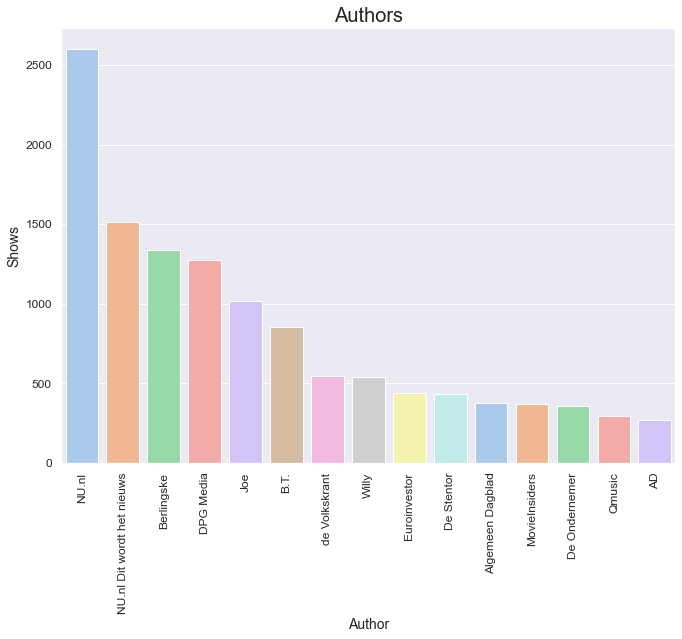

In [15]:
# Plot for authors
genre_names = df_merged['Author'].value_counts().index
genre_values = df_merged['Author'].value_counts().values

plt.xticks(rotation=90)
b = sns.barplot(x=genre_names[:15], y=genre_values[:15], palette=palette)
b.axes.set_title("Authors",fontsize=20)
b.set_xlabel("Author",fontsize=14)
b.set_ylabel("Shows",fontsize=14)
b.tick_params(labelsize=12)
plt.show()

Episodes without chapters:  22006
Episodes with chapters 646
total:  22652


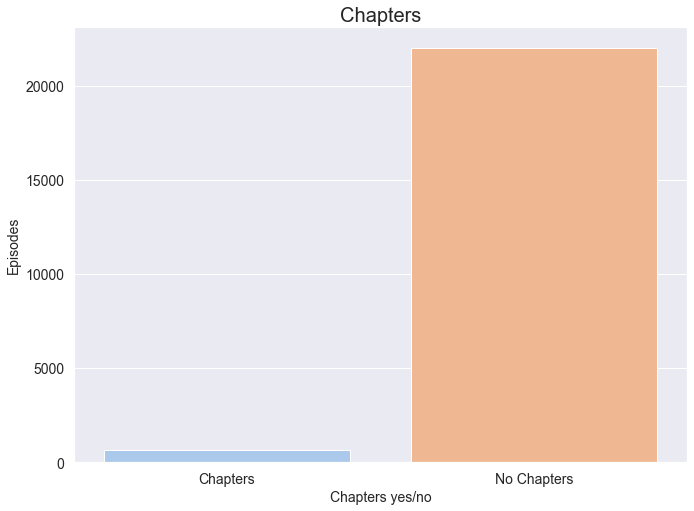

In [16]:

count_nan = len(df_merged) - df_merged['Chapters_dict'].count()

# print(df_merged['Chapters_dict'].unique())
print("Episodes without chapters: " , count_nan)
print("Episodes with chapters", df_merged['Chapters_dict'].count())
print("total: ", len(df_merged))

# Plot for Chapters
col_ids = ["Chapters", "No Chapters"]
col_values = [df_merged['Chapters_dict'].count(), count_nan]

# Show barplot
b = sns.barplot(x=col_ids, y=col_values, palette=palette)
b.axes.set_title("Chapters",fontsize=20)
b.set_xlabel("Chapters yes/no",fontsize=14)
b.set_ylabel("Episodes",fontsize=14)
b.tick_params(labelsize=14)
plt.show()

On average there are 4.620743034055727 chapters (if there are any) 


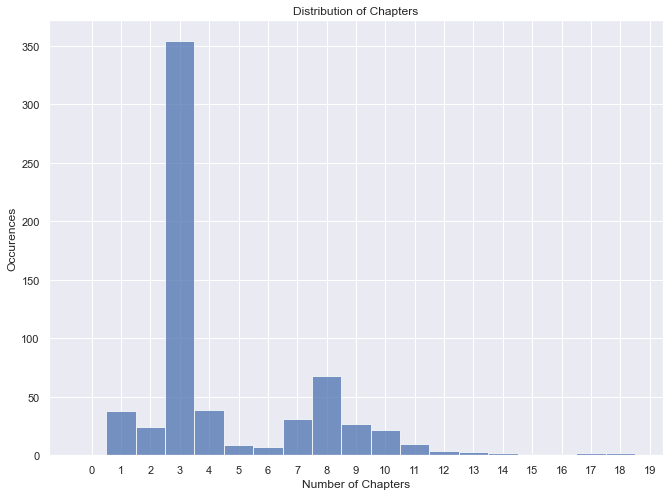

In [17]:
df_chapters = df_merged[df_merged['Chapters_dict'].notna()]
df_nochapters = df_merged[df_merged['Chapters_dict'].isna()]
col_one_list = df_chapters['Chapters_dict'].tolist()

chapters_dist = [len(k.keys()) for k in col_one_list]
mean_chapters = sum(chapters_dist) / len(col_one_list)
print("On average there are {} chapters (if there are any) ".format( sum(len(k.keys()) for k in col_one_list) / len(col_one_list)))

r = len(set(chapters_dist))

# n, bins, patches = plt.hist(chapters_dist, r, density=False,  alpha=0.75)
n, bins, patches = plt.hist(chapters_dist, bins=np.arange(r)-0.5, density=False,  alpha=0.75)

plt.xticks(range(r))
plt.xlabel('Number of Chapters')
plt.ylabel('Occurences')
plt.title('Distribution of Chapters')
plt.grid(True)
plt.show()

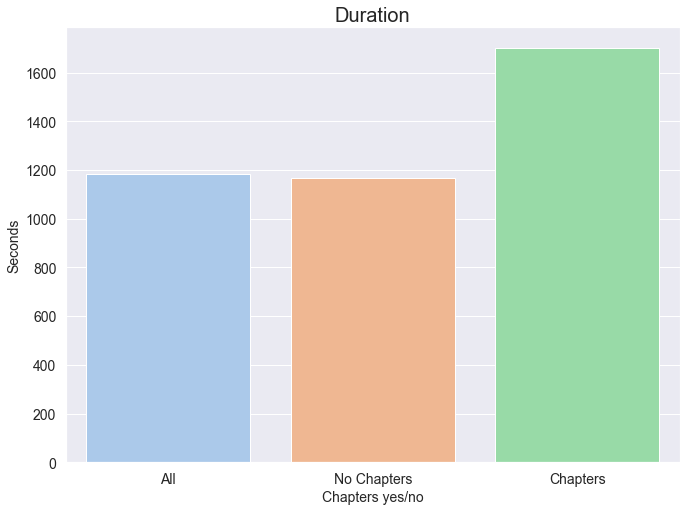

In [18]:
# Average duration normal podcasts
# Average duration 
secs = df_merged["DurationSeconds"].mean()
secs_chapters = df_chapters["DurationSeconds"].mean()
secs_nochapters = df_nochapters["DurationSeconds"].mean()

# Plot for Chapters
col_ids = ["All", "No Chapters", "Chapters"]
col_values = [secs, secs_nochapters, secs_chapters]

# Show barplot
b = sns.barplot(x=col_ids, y=col_values, palette=palette)
b.axes.set_title("Duration",fontsize=20)
b.set_xlabel("Chapters yes/no",fontsize=14)
b.set_ylabel("Seconds",fontsize=14)
b.tick_params(labelsize=14)
plt.show()

okay


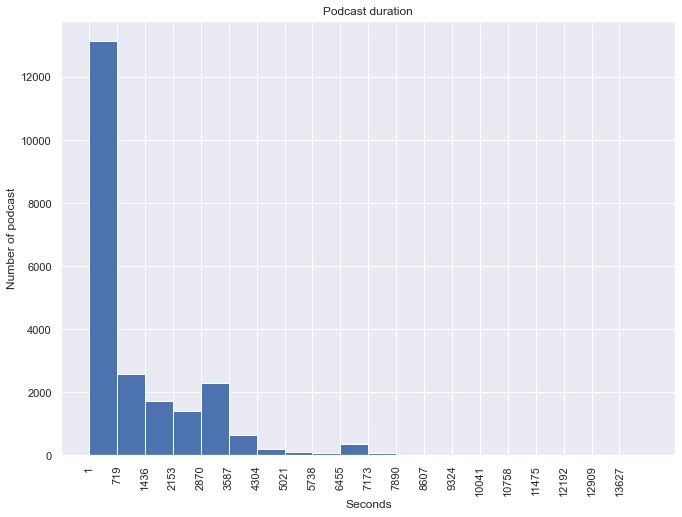

hi


In [19]:

r = 20
x = df_merged.DurationSeconds
x.plot.hist(bins=r)
print("okay")

plt.xticks(np.arange(min(x), max(x), max(x)/r), rotation='vertical')
plt.xlabel('Seconds')
plt.ylabel('Number of podcast')
plt.title('Podcast duration')
plt.show()


print("hi")

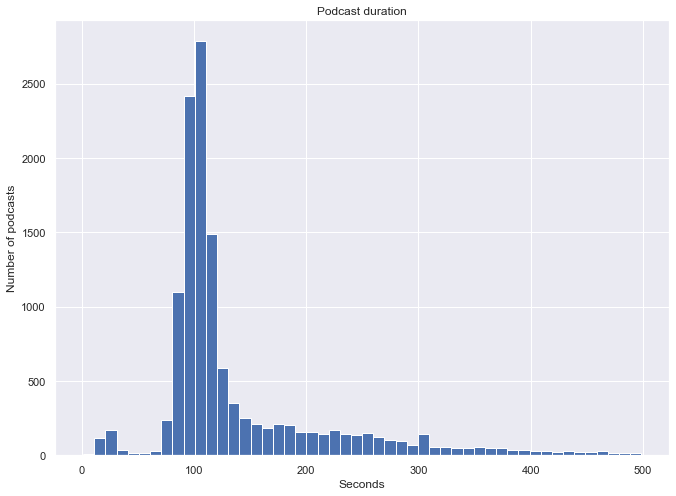

In [20]:
x = df_merged.loc[(df_merged['DurationSeconds'] <= 500)].DurationSeconds
x.plot.hist(bins=50)

# plt.xticks(np.arange(min(x), max(x)+1, 500))
plt.xlabel('Seconds')
plt.ylabel('Number of podcasts')
plt.title('Podcast duration')
plt.show()


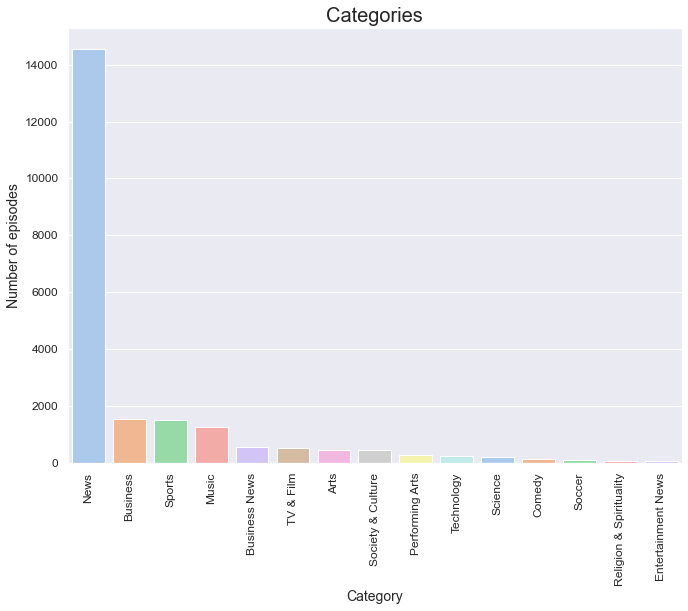

In [21]:
# Categories distribution
x_names = df_merged['Category'].value_counts().index
x_values = df_merged['Category'].value_counts().values

plt.xticks(rotation=90)
b = sns.barplot(x=x_names[:15], y=x_values[:15], palette=palette)
b.axes.set_title("Categories",fontsize=20)
b.set_xlabel("Category",fontsize=14)
b.set_ylabel("Number of episodes",fontsize=14)
b.tick_params(labelsize=12)
plt.show()




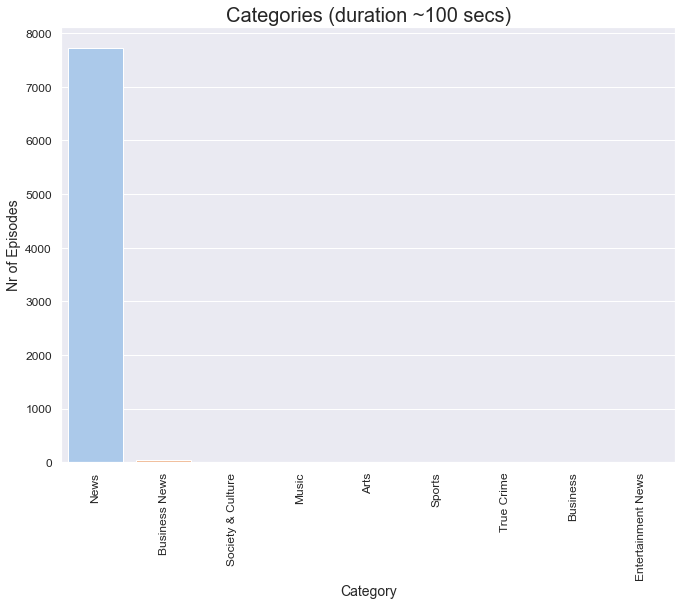

These 7769 short-news podcasts come from 23 playlists


,Author,DefaultPlaylistId,Category,ProgramDescription,AudioUrl,DurationSeconds,Title
207,NaN,96fdaa02-a0cf-4cbd-bc5e-ac9200937420,News,NaN,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,119.667,Het AD nieuws van zaterdag 19 december
208,NaN,96fdaa02-a0cf-4cbd-bc5e-ac9200937420,News,NaN,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,118.779,Het AD nieuws van vrijdag 18 december
209,NaN,96fdaa02-a0cf-4cbd-bc5e-ac9200937420,News,NaN,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,99.344,Het AD nieuws van donderdag 17 december
210,NaN,96fdaa02-a0cf-4cbd-bc5e-ac9200937420,News,NaN,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,115.226,Een tweede wijziging in de titel
1402,De Stentor,7922b682-588e-4a4b-a6ee-ac4c00b723f1,News,Alle uitgebreide interviews van de Stentor.,https://traffic.omny.fm/d/clips/33dbd2dc-d464-...,100.676,Luisterpaal vertelt wat er te zien is in Zutph...


In [22]:
tmp = df_merged.loc[(df_merged['DurationSeconds'] <= 120) & (df_merged['DurationSeconds'] >= 80)]

x_names = tmp['Category'].value_counts().index
x_values = tmp['Category'].value_counts().values

plt.xticks(rotation=90)
b = sns.barplot(x=x_names[:15], y=x_values[:15], palette=palette)
b.axes.set_title("Categories (duration ~100 secs)",fontsize=20)
b.set_xlabel("Category",fontsize=14)
b.set_ylabel("Nr of Episodes",fontsize=14)
b.tick_params(labelsize=12)
plt.show()




print("These {} short-news podcasts come from {} playlists".format(len(list(tmp.DefaultPlaylistId)), len(set(list(tmp.DefaultPlaylistId)))))

tmp = df_merged.loc[(df_merged['DurationSeconds'] <= 120) & (df_merged['DurationSeconds'] >= 80)]
cols = ['Author', 'DefaultPlaylistId','Category', 'ProgramDescription', 'AudioUrl', 'DurationSeconds','Title']
tmp2 = tmp[cols]
tmp2.head()


Full       22575
Bonus         47
Trailer       30
Name: EpisodeType, dtype: int64


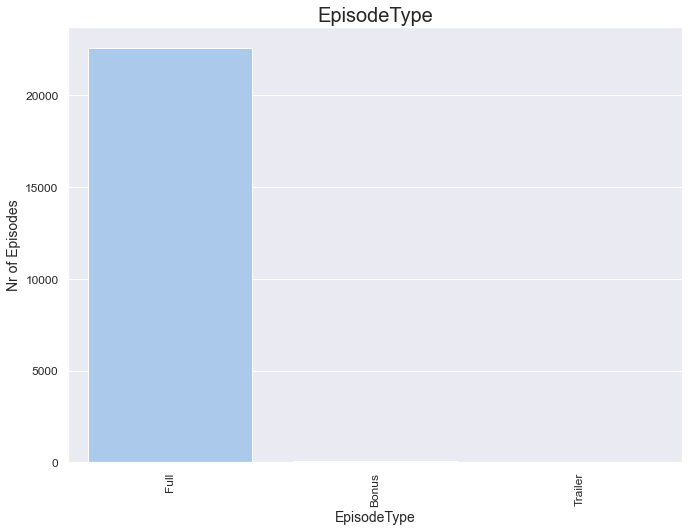

367.54902127659574
--- Bonus shows


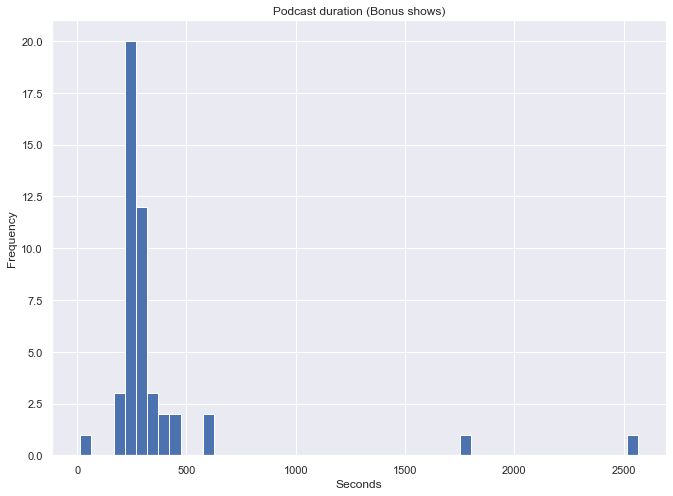

--- Trailer shows


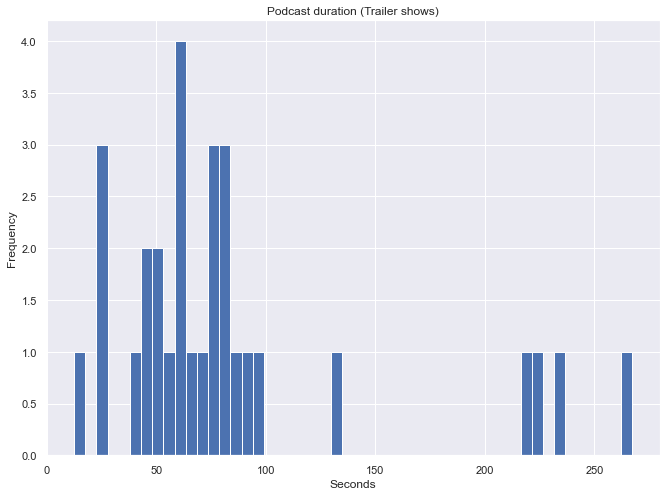

I think I should remove Trailers and Bonus


In [23]:
# EpisodeType
print(df_merged['EpisodeType'].value_counts())
x_names = df_merged['EpisodeType'].value_counts().index
x_values = df_merged['EpisodeType'].value_counts().values

plt.xticks(rotation=90)
b = sns.barplot(x=x_names[:15], y=x_values[:15], palette=palette)
b.axes.set_title("EpisodeType",fontsize=20)
b.set_xlabel("EpisodeType",fontsize=14)
b.set_ylabel("Nr of Episodes",fontsize=14)
b.tick_params(labelsize=12)
plt.show()

print(df_merged.loc[(df_merged['EpisodeType'] == "Bonus")]['DurationSeconds'].mean())

print("--- Bonus shows")
df_merged.loc[(df_merged['EpisodeType'] == "Bonus")]['DurationSeconds'].plot.hist(bins=50)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Podcast duration (Bonus shows)')
plt.show()


print("--- Trailer shows")
df_merged.loc[(df_merged['EpisodeType'] == "Trailer")]['DurationSeconds'].plot.hist(bins=50)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Podcast duration (Trailer shows)')
plt.show()


print("I think I should remove Trailers and Bonus")



#### Analysing AudioUrl

In [24]:

# AudioURL
print("Checking if all rows contain an individual AudioUrl")

num_dups = len(df_merged['AudioUrl'])-len(df_merged['AudioUrl'].drop_duplicates())
num_nan = df_merged['AudioUrl'].isna().sum()

print("The column audioURL contains {} duplicate values, and {} NaN values".format(num_dups, num_nan))


Checking if all rows contain an individual AudioUrl
The column audioURL contains 0 duplicate values, and 0 NaN values


#### Analysing Contentrating

Unrated     21392
Clean        1247
Explicit       13
Name: ContentRating, dtype: int64


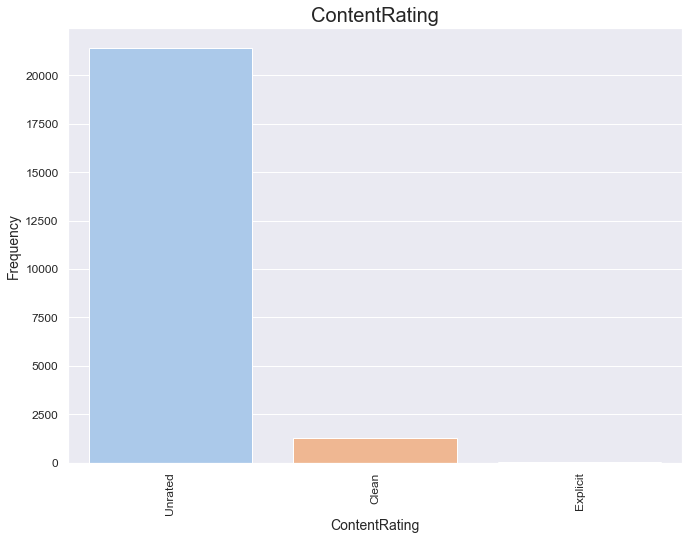

In [25]:
# contentrating 
print(df_merged['ContentRating'].value_counts())
x_names = df_merged['ContentRating'].value_counts().index
x_values = df_merged['ContentRating'].value_counts().values


plt.xticks(rotation=90)
b = sns.barplot(x=x_names[:15], y=x_values[:15], palette=palette)
b.axes.set_title("ContentRating",fontsize=20)
b.set_xlabel("ContentRating",fontsize=14)
b.set_ylabel("Frequency",fontsize=14)
b.tick_params(labelsize=12)
plt.show()


#### Analysing Descriptions

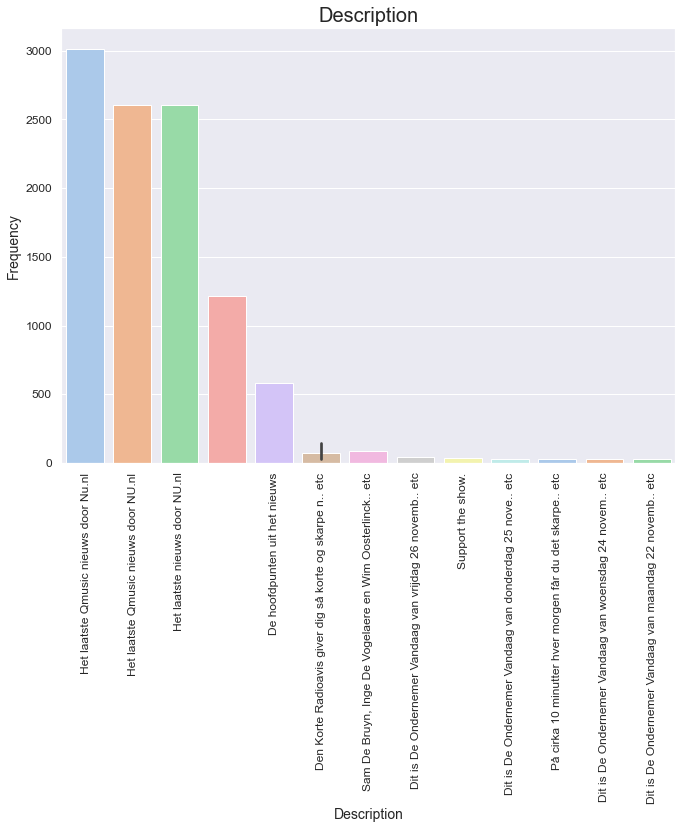

In [26]:

maxlen = 50
x_names = df_merged['Description'].value_counts().index
x_names_short = [name[:maxlen] + ".. etc" if len(name) > maxlen else name for name in x_names]

x_values = df_merged['Description'].value_counts().values

plt.xticks(rotation=90)
b = sns.barplot(x=x_names_short[:15], y=x_values[:15], palette=palette)
b.axes.set_title("Description",fontsize=20)
b.set_xlabel("Description",fontsize=14)
b.set_ylabel("Frequency",fontsize=14)
b.tick_params(labelsize=12)
plt.show()



Text(0.5, 0, 'Characters')

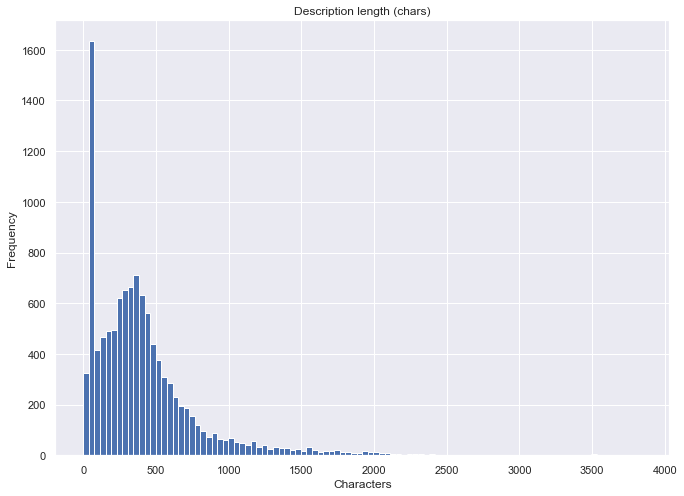

In [27]:
# Description length
x_names = df_merged['Description'].value_counts().index
x_names_len = [len(name) for name in x_names]

plt.title("Description length (chars)")
plt.hist(x_names_len, density=False,  bins=100)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Characters')


## Dropping dataframe rows

In [30]:

df_final = df_merged.copy()

In [31]:
print("Original length: ", len(df_final))

# Drop non-dutch podcasts
df_final.drop(df_final[df_final.Language != 'nl'].index, inplace=True)
print("Length after dropping non-dutch: ", len(df_final))

# Drop trailers and bonus
df_final.drop(df_final[df_final.EpisodeType != 'Full'].index, inplace=True)
print("Length after dropping non-full episodetype: ", len(df_final))

# Drop if shorter than 2 minutes
#df_final.drop(df_final[df_final.DurationSeconds <= 120].index, inplace=True)
#print("Length after dropping <= 2mins: ", len(df_final))

# Drop if shorter than 3 minutes
#df_final.drop(df_final[df_final.DurationSeconds <= 180].index, inplace=True)
#print("Length after dropping <= 3mins: ", len(df_final))


Original length:  22652
Length after dropping non-dutch:  19565
Length after dropping non-full episodetype:  19488


In [32]:
informative_cols = ['Author', 'Categories', 'Category', 'DefaultPlaylistId',
       'ProgramDescription', 'ProgramId', 'Name',
       'NetworkId', 'AudioUrl', 
       'Description', 'DurationSeconds',
       'Id', 'Title', 'Chapters_dict']

df_final = df_final[informative_cols]
print("Final used cols: ", df_final.columns)
print(len(df_final.Id.unique()))

Final used cols:  Index(['Author', 'Categories', 'Category', 'DefaultPlaylistId',
       'ProgramDescription', 'ProgramId', 'Name', 'NetworkId', 'AudioUrl',
       'Description', 'DurationSeconds', 'Id', 'Title', 'Chapters_dict'],
      dtype='object')
19488


In [33]:
df_final.to_pickle("./omny/omny_clean.pkl")
df_final.to_pickle("../data/omny/omny_clean.pkl")

## Scraping audio

In [70]:
# Imports
from pathlib import Path
import urllib.request 

# Specify directories
output_dir = '../data/omny/raw_audio/'
Path(output_dir).mkdir(parents=True, exist_ok=True)



In [505]:
class AudioScraper:
    def __init__(self, output_dir, df_final):
        self.output_dir = output_dir
        self.audiolist = list(df_final.AudioUrl)
        self.namelist = list(df_final.Id)
        print("AudioScraper initialized")
        
    
    def scrape(self):
        for i in range(len(self)):
            self.scrape_idx(i)
            
            if i >= 15:
                print("For now only the first 15")
                break
    def scrape_idx(self, idx):
        print("Scraping {}/{}".format(idx, len(self)))
        
        filename = self.namelist[idx]+'.mp3'
        audiolink = self.audiolist[idx]

        output_name = os.path.join(output_dir, filename) 
        urllib.request.urlretrieve(audiolink, output_name)
        
    def __len__(self):
        """ Denotes the total number of utterances """
        return len(self.namelist)
        

        
scraper = AudioScraper(output_dir, df_final)

scraper.scrape()




AudioScraper initialized
Scraping 0/9346
Scraping 1/9346
Scraping 2/9346
Scraping 3/9346
Scraping 4/9346
Scraping 5/9346
Scraping 6/9346
Scraping 7/9346
Scraping 8/9346
Scraping 9/9346
Scraping 10/9346
Scraping 11/9346
Scraping 12/9346
Scraping 13/9346
Scraping 14/9346
Scraping 15/9346
Scraping 16/9346


RuntimeError: No active exception to reraise